In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#first question
daily_df = pd.read_csv('daily_rev.csv')
daily_df['date'] = pd.to_datetime(daily_df['date'])
countries = ['Italy', 'India', 'United States']
df_selected = daily_df[daily_df['country'].isin(countries)]
df_countries = {country: df_selected[df_selected['country'] == country] for country in countries}


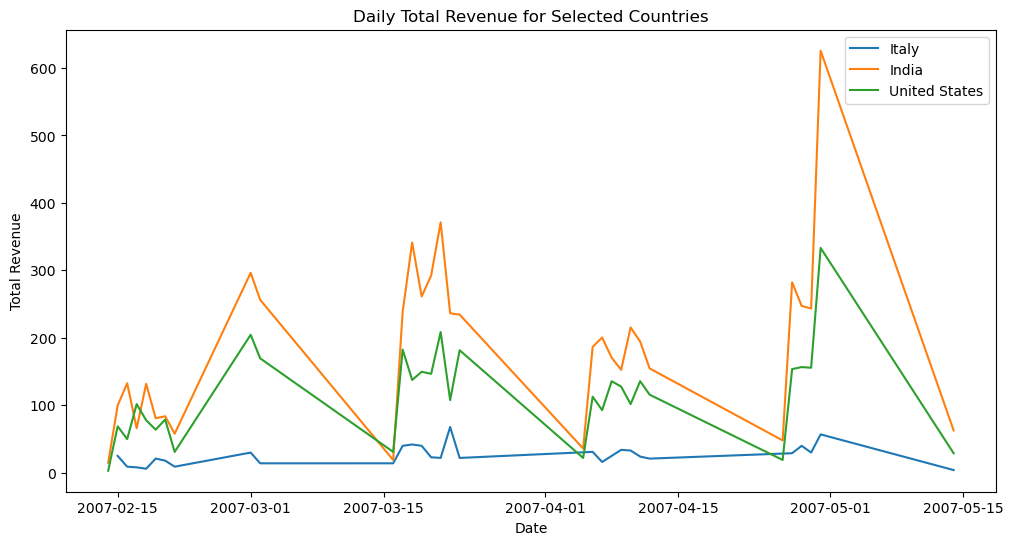

In [4]:
plt.figure(figsize=(12, 6))

for country in countries:
    plt.plot(df_countries[country]['date'], df_countries[country]['total_revenue'], label=country)

plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Total Revenue for Selected Countries')
plt.legend()

plt.show()

In [5]:
#second question
film_df = pd.read_csv('film_desc.csv')

In [6]:
def sentiment_detection(sentence):
    thriller_words = ('Thrilling','Discover','Hunter,Secret','Agent,Explore', 'Kill','Action','Abandoned', 'Discover', 'Explore')
    dramatic_words = ('Drama','Emotional','Touching','Story','Inspiring','Intense','heartbreaking','Tension')

    thriller = any(word in sentence for word in thriller_words)
    dramatic = any(word in sentence for word in dramatic_words)

    if not thriller and not dramatic:
        return "neutral"
    elif thriller != dramatic:
        return "thriller" if thriller else "dramatic"
    else:
        return "mixed"

In [7]:
film_df['sentiment'] = film_df['description'].apply(sentiment_detection)

In [8]:
film_df

,film_id,title,description,sentiment
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,neutral
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,mixed
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,neutral
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,neutral
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,dramatic
...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,neutral
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,dramatic
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,neutral
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,thriller


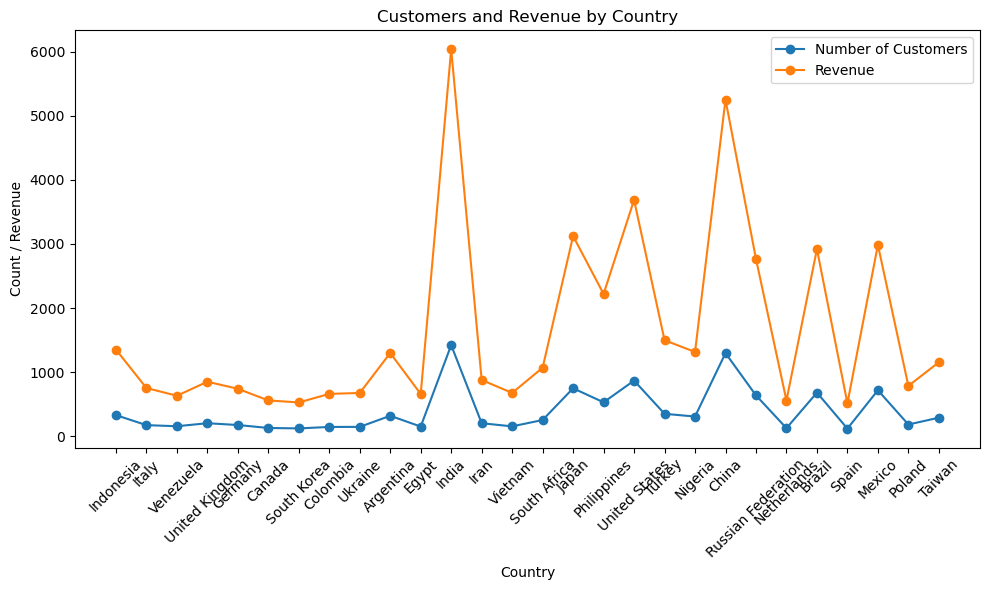

In [70]:
#third question
country_df = pd.read_csv('country_rev.csv')
selected_df = country_df[(country_df['revenue_from_country'] >= 500) ]

# Select specific columns
selected_df = selected_df[['country', 'revenue_from_country','no_of_customer']]

plt.figure(figsize=(10, 6))
plt.plot(selected_df['country'], selected_df['no_of_customer'], marker='o', label='Number of Customers')
plt.plot(selected_df['country'], selected_df['revenue_from_country'], marker='o', label='Revenue')
plt.xlabel('Country')
plt.ylabel('Count / Revenue')
plt.title('Customers and Revenue by Country')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

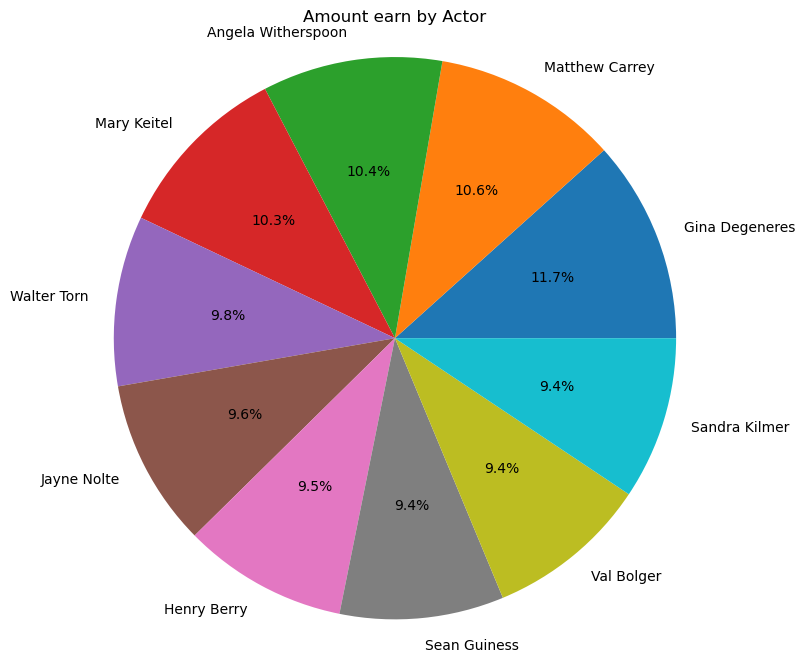

In [50]:
#fourth question
topactor_df = pd.read_csv('topactor.csv')
ten_actor = topactor_df.head(10)
#pie chart for top ten acotrs
plt.figure(figsize=(8, 8))
plt.pie(ten_actor['amount'], labels=ten_actor['actor'], autopct='%1.1f%%')
plt.title('Amount earn by Actor')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [51]:
#fifth question
data = {
    'country': ['Thailand', 'United States', 'Spain', 'Canada', 'Ecuador', 'Russia', 'Switzerland',
                'Brazil', 'Australia', 'Greece', 'India', 'Kenya', 'China', 'Mexico', 'Sweden',
                'South Africa', 'Japan', 'France', 'Argentina', 'Norway'],
    'Weather Category': ['Tropical', 'Temperate', 'Mediterranean', 'Temperate', 'Equatorial', 'Arctic', 'Alpine',
                         'Tropical', 'Temperate', 'Mediterranean', 'Tropical', 'Tropical', 'Temperate', 'Tropical',
                         'Temperate', 'Temperate', 'Temperate', 'Temperate', 'Temperate', 'Temperate']
}

weather = pd.DataFrame(data)

#sixth question
country_data= pd.read_csv('country_rev.csv')
merged_df = pd.merge(country_data, weather, on='country', how='outer')
merged_df

,country,no_of_customer,revenue_from_country,Weather Category
0,Thailand,92.0,401.08,Tropical
1,"Virgin Islands, U.S.",31.0,121.69,NaN
2,Faroe Islands,24.0,96.76,NaN
3,Bangladesh,81.0,353.19,NaN
4,Indonesia,331.0,1352.69,NaN
...,...,...,...,...
106,French Guiana,20.0,97.80,NaN
107,Greenland,28.0,119.72,NaN
108,Russia,NaN,NaN,Arctic
109,Australia,NaN,NaN,Temperate
